In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import datetime

import talib as ta
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
# Importing libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from  sklearn.ensemble import GradientBoostingClassifier
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,precision_score,recall_score

In [2]:
NewDF = pd.read_csv("C:\\Users\\marli\\Downloads\\FinalAnalysisMin1.csv")
NewDF.head(1)

,Unnamed: 0,Symbol,Name,Market Cap,Country,Sector,Industry,XGB StragyReturn,XGB recall -1,XGB recall 0,...,Stacking precision 0,Stacking precision 1,Stacking accuracy,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1
0,0,CWT,California Water Service Group Common Stock,3.530523e+09,United States,Public Utilities,Water Supply,-0.00003,0.313953,0.507246,...,0.108108,0.108108,0.348178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
NewDF.groupby(['Sector']).mean()[["XGB accuracy","Stacking accuracy","RandomForest accuracy","KNN accuracy"]]#Sector,'Country'
#.groupby(['Sector'])

,XGB accuracy,Stacking accuracy,RandomForest accuracy,KNN accuracy
Sector,,,,
Basic Industries,0.370990,0.340015,0.374572,0.343632
Capital Goods,0.372433,0.356840,0.376313,0.367578
Consumer Durables,0.386497,0.354142,0.390977,0.346213
Consumer Non-Durables,0.377788,0.351163,0.375823,0.349160
Consumer Services,0.373593,0.350316,0.378269,0.353524
Energy,0.376715,0.339368,0.386304,0.349309
Finance,0.381497,0.358931,0.387751,0.357760
Health Care,0.382147,0.362808,0.383399,0.356309
Miscellaneous,0.365765,0.350735,0.370714,0.353136


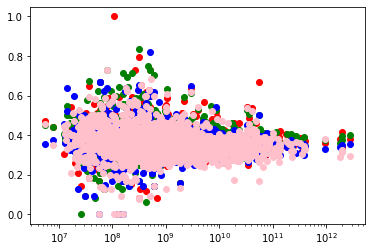

In [4]:
X = NewDF["Market Cap"]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X,NewDF["XGB accuracy"],color="r")
plt.scatter(X,NewDF["RandomForest accuracy"],color="g")
plt.scatter(X,NewDF["KNN accuracy"],color="b")
plt.scatter(X,NewDF["Stacking accuracy"],color="pink")
ax.set_xscale('log')

array([[<AxesSubplot:title={'center':'XGB accuracy'}>,
        <AxesSubplot:title={'center':'RandomForest accuracy'}>],
       [<AxesSubplot:title={'center':'KNN accuracy'}>,
        <AxesSubplot:title={'center':'Stacking accuracy'}>]], dtype=object)

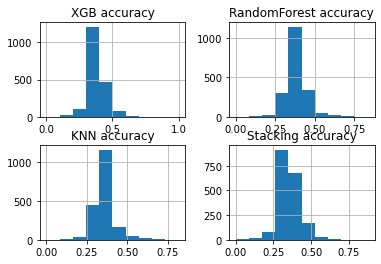

In [5]:
NewDF[["XGB accuracy","RandomForest accuracy","KNN accuracy","Stacking accuracy"]].hist()

In [6]:
#"XGB accuracy","RandomForest accuracy","KNN accuracy","Stacking accuracy"
SignalMetric = "RandomForest accuracy"
NewDF['Signal'] = 0
NewDF.loc[NewDF[SignalMetric] > NewDF[SignalMetric].quantile(q=0.66), 'Signal'] = -1
NewDF.loc[NewDF[SignalMetric] < NewDF[SignalMetric].quantile(q=0.33), 'Signal'] = 1
X = NewDF[["Country","Market Cap","Sector","Industry"]]
Y = NewDF["Signal"]

In [7]:
X_Train, X_Test, Y_Train, Y_Test = \
    train_test_split(X, Y, test_size=0.3, random_state=1)

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ("Num",StandardScaler(), ["Market Cap"]),
        ("Cat",OneHotEncoder(handle_unknown="ignore"), ["Country","Sector","Industry"]),
    ]
)

In [9]:
#conda install graphviz
import graphviz

In [10]:
X_Train.head(1)

,Country,Market Cap,Sector,Industry
1369,United States,68592594.0,Health Care,Medical/Dental Instruments


0.387434554973822


<AxesSubplot:>

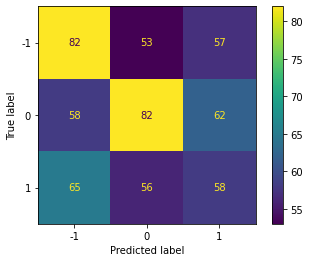

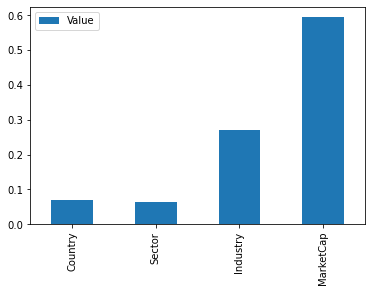

In [12]:
#from sklearn import tree
#from sklearn.tree import RandomForestClassifier 
clf = RandomForestClassifier(random_state=1234)
#KNN = KNeighborsClassifier(n_neighbors=20)
steps = [('Transform', preprocessor) , ('Model', clf)]
pipeline = Pipeline(steps)
pipeline.fit(X_Train, Y_Train)

predictions = pipeline.predict(X_Test)
cm = confusion_matrix(Y_Test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
print(accuracy_score(Y_Test, predictions))
importances = pipeline.steps[1][1].feature_importances_
std = np.std([pipeline.steps[1][1].feature_importances_ for tree in pipeline.steps[1][1].estimators_], axis=0)
forest_importances = pd.Series(importances, index=pipeline.steps[0][1].get_feature_names_out())
forest_importances2 = forest_importances.reset_index(level=0, inplace=False)
Ranking = {"Country" : 0,
           "Sector" : 0,
           "Industry" : 0,
           "MarketCap" : forest_importances[0],
          }
SDRanking = {"Country" : 0,
           "Sector" : 0,
           "Industry" : 0,
           "MarketCap" : std[0]
          }


#for index, row in forest_importances2[1:].iterrows():
for i in range(1,len(forest_importances2)):
    if "Country" in forest_importances2["index"][i]:
        Ranking["Country"]+=forest_importances2[0][i]
        SDRanking["Country"]+=std[i]
        continue
    if "Sector" in forest_importances2["index"][i]:
        Ranking["Sector"]+=forest_importances2[0][i]
        SDRanking["Sector"]+=std[i]
        continue
    if "Industry" in forest_importances2["index"][i]:
        Ranking["Industry"]+=forest_importances2[0][i]
        SDRanking["Industry"]+=std[i]
        continue
    print(forest_importances2["index"][i])
    raise Exception
    
ResultDF = pd.DataFrame({'Value':pd.Series(Ranking),'SD':pd.Series(SDRanking)})



fig, ax = plt.subplots()
ResultDF.plot.bar(yerr="SD", ax=ax)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()